In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [23]:
df.describe()            
#The column balance duration are right skewed and there may be some outliers.

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [24]:
df.isna().sum()    
# no null values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [26]:
df['job'].nunique()

12

In [28]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [30]:
df['education'].nunique()

4

In [31]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [32]:
df['default'].nunique()

2

In [33]:
df.duplicated().sum()      #No duplicate value

0

## For Outlliers Detection

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

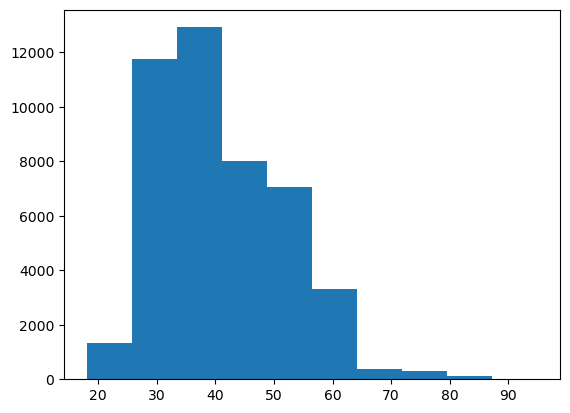

In [34]:
plt.hist(df['age'])
plt.grid

{'whiskers': [<matplotlib.lines.Line2D at 0x174cc3def70>,
 'caps': [<matplotlib.lines.Line2D at 0x174c79fd250>,
 'boxes': [<matplotlib.lines.Line2D at 0x174cc3de4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x174c79fda30>],
 'fliers': [<matplotlib.lines.Line2D at 0x174c79fdd60>],
 'means': []}

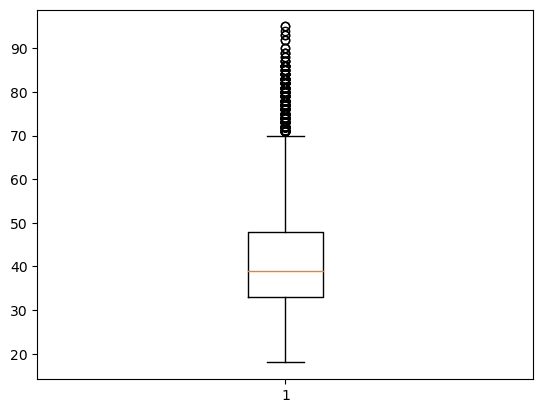

In [35]:
plt.boxplot(df['age'])    # Some outliers in age columns

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

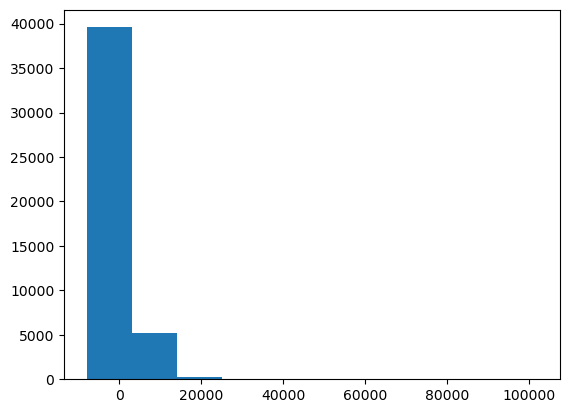

In [36]:
plt.hist(df['balance'])
plt.grid

In [37]:
median = df['age'].median()

In [38]:
df["age"] = np.where(df["age"]>70, median,df['age'])

<AxesSubplot:>

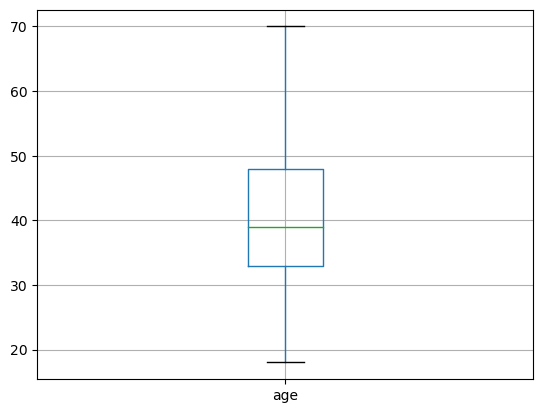

In [39]:
df.boxplot('age')    #Outliers replacement done.

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [41]:
df.shape

(45211, 17)

In [42]:
le = LabelEncoder()
cols = ['default','education','loan','month','marital','housing','contact','poutcome','y','job']

In [43]:
df[cols]= df[cols].apply(le.fit_transform)

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44.0,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33.0,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47.0,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33.0,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  int32  
 2   marital    45211 non-null  int32  
 3   education  45211 non-null  int32  
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  int32  
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int32  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int32  
 16  y          45211 non-null  int32  
dtypes: float64(1), int32(10), int64(6)
memory usage: 4.1 MB


In [46]:
df['age']

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    39.0
45208    39.0
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64

In [47]:
df['age'] = df['age'].astype(int)

In [48]:
df.info()        # Data type of all data set is same.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int32
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(11), int64(6)
memory usage: 4.0 MB


In [49]:
x = df.iloc[:,1:16]
y = df.iloc[:,16]

## Splitting data set into training and testing set

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [56]:
xtrain

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
32731,1,1,1,0,137,1,0,0,17,0,343,2,316,3,1
1498,1,1,0,0,830,1,0,2,8,8,246,2,-1,0,3
17532,9,1,2,0,1103,1,1,0,29,5,148,15,-1,0,3
8166,7,2,1,0,229,1,0,2,2,6,214,2,-1,0,3
15495,4,1,1,0,2858,1,1,0,18,5,247,5,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,9,1,2,0,1830,0,0,0,14,8,318,3,-1,0,3
32511,4,0,2,0,528,1,0,0,17,0,233,2,-1,0,3
5192,4,1,2,0,4191,0,0,2,21,8,363,6,-1,0,3
12172,0,1,3,0,1783,0,0,2,20,6,11,11,-1,0,3


In [57]:
xtrain.shape

(33908, 15)

In [59]:
ytrain

32731    0
1498     0
17532    0
8166     0
15495    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: y, Length: 33908, dtype: int32

## Model Building

In [62]:
sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [63]:
xtrain

array([[-1.01567473, -0.27720168, -0.29609487, ...,  2.75756048,
         1.27620946, -1.58172209],
       [-1.01567473, -0.27720168, -1.63422427, ..., -0.40992157,
        -0.29917499,  0.44350335],
       [ 1.42983476, -0.27720168,  1.04203453, ..., -0.40992157,
        -0.29917499,  0.44350335],
       ...,
       [-0.09860867, -0.27720168,  1.04203453, ..., -0.40992157,
        -0.29917499,  0.44350335],
       [-1.32136341, -0.27720168,  2.38016392, ..., -0.40992157,
        -0.29917499,  0.44350335],
       [-1.01567473, -0.27720168,  2.38016392, ...,  2.95740162,
         0.75108131, -1.58172209]])

In [64]:
x.columns

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [65]:
xtrain = pd.DataFrame(xtrain,columns=x.columns)

In [66]:
xtrain

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.015675,-0.277202,-0.296095,-0.134556,-0.395753,0.892601,-0.436183,-0.711169,0.143594,-1.840886,0.327199,-0.246900,2.757560,1.276209,-1.581722
1,-1.015675,-0.277202,-1.634224,-0.134556,-0.173459,0.892601,-0.436183,1.520502,-0.938191,0.822443,-0.047997,-0.246900,-0.409922,-0.299175,0.443503
2,1.429835,-0.277202,1.042035,-0.134556,-0.085889,0.892601,2.292616,-0.711169,1.585975,-0.176306,-0.427061,3.891759,-0.409922,-0.299175,0.443503
3,0.818457,1.365755,-0.296095,-0.134556,-0.366243,0.892601,-0.436183,1.520502,-1.659382,0.156610,-0.171773,-0.246900,-0.409922,-0.299175,0.443503
4,-0.098609,-0.277202,-0.296095,-0.134556,0.477064,0.892601,2.292616,-0.711169,0.263793,-0.176306,-0.044129,0.708176,-0.409922,-0.299175,0.443503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1.429835,-0.277202,1.042035,-0.134556,0.147312,-1.120322,-0.436183,-0.711169,-0.217001,0.822443,0.230499,0.071459,-0.409922,-0.299175,0.443503
33904,-0.098609,-1.920158,1.042035,-0.134556,-0.270332,0.892601,-0.436183,-0.711169,0.143594,-1.840886,-0.098281,-0.246900,-0.409922,-0.299175,0.443503
33905,-0.098609,-0.277202,1.042035,-0.134556,0.904652,-1.120322,-0.436183,1.520502,0.624388,0.822443,0.404559,1.026534,-0.409922,-0.299175,0.443503
33906,-1.321363,-0.277202,2.380164,-0.134556,0.132235,-1.120322,-0.436183,1.520502,0.504190,0.156610,-0.956977,2.618326,-0.409922,-0.299175,0.443503


In [67]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [68]:
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [69]:
len(xtest)
len(ytest)

11303

In [70]:
len(xtrain)
len(ytrain)

33908

In [71]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

## Evalution of Matrix

In [72]:
confusion_matrix(ytest,ypred)

array([[9797,  201],
       [1023,  282]], dtype=int64)

<AxesSubplot:>

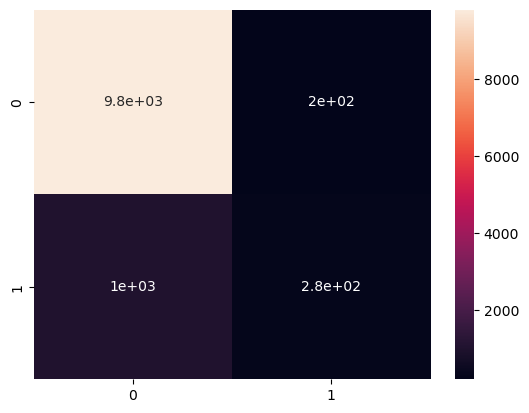

In [73]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [74]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9998
           1       0.58      0.22      0.32      1305

    accuracy                           0.89     11303
   macro avg       0.74      0.60      0.63     11303
weighted avg       0.87      0.89      0.87     11303



## Hyperparameter Tunning

In [77]:
accuracy_score(ytest,ypred)

0.8917101654428028

In [78]:
print(ytest.values)

print(ypred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]


In [79]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.01393614, 0.04000714, 0.27592387, ..., 0.24893926, 0.81114254,
       0.01453952])

Text(0, 0.5, 'True Positive Rate')

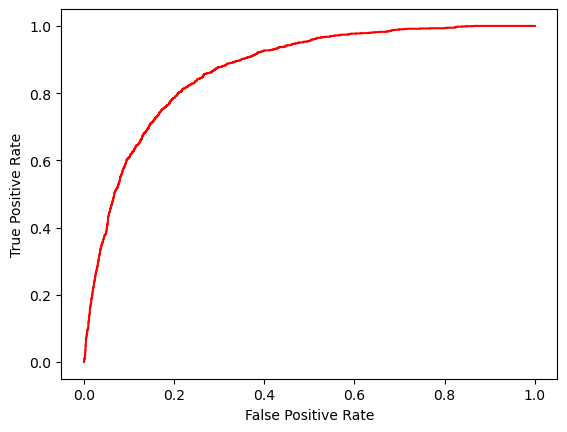

In [80]:
auc = roc_auc_score(ytest,proba)

fpr,tpr,threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,color = 'red',label = 'AUC=%0.2f'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [81]:
threshold

array([1.99999941e+00, 9.99999407e-01, 9.99973582e-01, ...,
       1.28382558e-02, 1.28320364e-02, 5.22773249e-05])

In [84]:
for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    

threshold_selection = pd.concat([pd.Series(accuracy),pd.Series(threshold)],axis=1)
threshold_selection.columns = ['Accuracy','Threshold']
threshold_selection.sort_values(by = 'Accuracy',ascending = False)
        
#Same accuracy is shown

,Accuracy,Threshold
294,0.891887,0.436880
232,0.891887,0.496955
231,0.891887,0.497196
230,0.891799,0.499498
254,0.891799,0.473812
...,...,...
1742,0.249403,0.013935
1743,0.249314,0.013927
1744,0.234716,0.012838
1745,0.234628,0.012832


In [85]:
from sklearn.preprocessing import binarize

In [86]:
final_y = binarize([proba],threshold=0.43)[0]

In [87]:
print(classification_report(ytest,final_y))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9998
           1       0.57      0.27      0.36      1305

    accuracy                           0.89     11303
   macro avg       0.74      0.62      0.65     11303
weighted avg       0.87      0.89      0.87     11303



In [88]:
ypred = pd.DataFrame(ypred)

In [89]:
ypred

,0
0,1
1,1
2,1
3,1
4,1
...,...
11298,1
11299,1
11300,1
11301,1


In [90]:
ypred.value_counts()

1    11302
0        1
dtype: int64